In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ----------- ------------------------- 92.2/293.3 kB 401.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 401.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 401.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 401.6 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 401.6 kB/s eta 0:00:01
     ----------------- ------------------ 143.4/293.3 kB 340.5 kB/s eta 0:00:01
     -------------------- --------------- 163.8/293.3 kB 338.3 kB/s eta 0:00:01
     ------------------------- ---------- 204.8/293.3 kB 414.8 kB/s eta

In [51]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/01/50/0d8d8f044e2a0d8151e9ed59fe50924e9e697ba43a8b12d5ff9b45adb871/matplotlib-3.8.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/87/2b/9b49451f7412cc1a79198e94a771a4e52d65c479aae610b1161c0290ef2c/contourpy-1.1.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1b/6d/93121de94919bd072a93131167d7c6244eb26fe9f2f897ddfee8eb550ffa/fonttools-4.42.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 41.0/154.

In [2]:
df = pd.read_csv('Fake_Real_Data.csv')

In [3]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.shape

(9900, 2)

In [11]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [12]:
df['label_num'] = df['label'].map({
    'Fake':0,
    'Real':1
})

In [13]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.Text,df.label_num, test_size = 0.20, random_state=2022,stratify=df.label_num)

In [19]:
X_train.shape,X_test.shape

((7920,), (1980,))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [24]:
from sklearn.pipeline import Pipeline
ctc = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB())
])

In [25]:
ctc.fit(X_train,y_train)
y_pred = ctc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [29]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocessing(text):
    clean_data = []  # Initialize clean_data for each text
    doc = nlp(text)
    for token in doc:
        if token.is_stop or token.is_punct or token.is_space:
            continue
        clean_data.append(token.lemma_)
        
    return " ".join(clean_data)

# Assuming you have a DataFrame named 'df'
df['preprocessed_txt'] = df.Text.apply(preprocessing)


In [30]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs Pathetic video ...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally purg...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


In [31]:
 X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_txt, df.label_num, test_size=0.20, random_state=2022)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
ctx = Pipeline([('vectorizer_n_grams',CountVectorizer(ngram_range=(1,3))),('random_forest',RandomForestClassifier())
               ])

In [41]:
ctx.fit(X_train,y_train) 

Pipeline(steps=[('vectorizer_n_grams', CountVectorizer(ngram_range=(1, 3))),
                ('random_forest', RandomForestClassifier())])

In [42]:
y_pred = ctx.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1024
           1       1.00      0.99      1.00       956

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

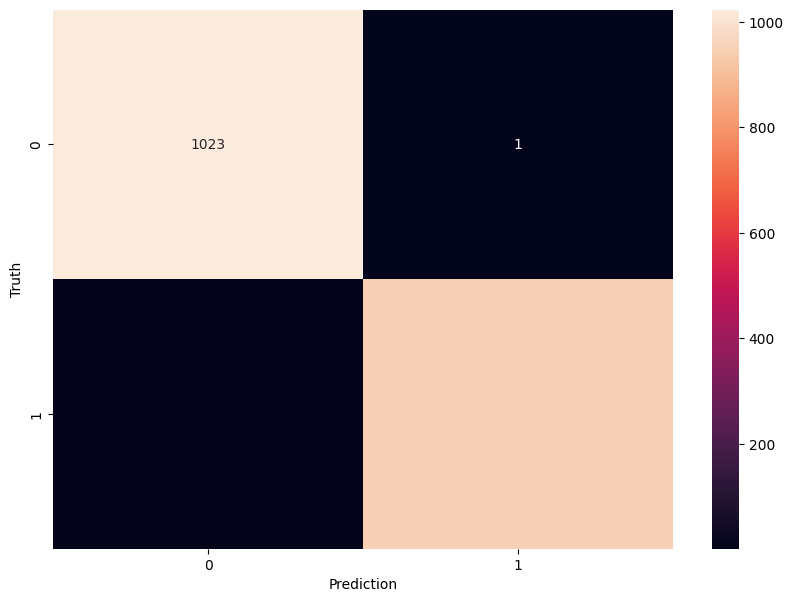

In [57]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')